# Dataset exploration


*   Explore the **In-shop Clothes Retrieval Benchmark** of the **DeepFashion** dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html
*   Import the dataset in `Google Colab` instead of downloading the whole dataset locally
*   Visualize some samples from the dataset
*   Look for variations and correlations in the dataset
*   Use the `matplotlib` and `seaborn` library to visualize data



###Importing DataSet from  Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Do Not Run this cell if already extracted!
!unzip /content/drive/MyDrive/Colab-Notebooks/img.zip -d /content/drive/MyDrive/Colab-Notebooks/deep-fashion-data

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

batch_size = 512

fdata = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab-Notebooks/deep-fashion-data/img',
    labels="inferred",
    batch_size=batch_size
  )

Found 52712 files belonging to 2 classes.


Classes in the Dataset

In [7]:
class_names = fdata.class_names
print(class_names)

['MEN', 'WOMEN']


###Visualizing Images

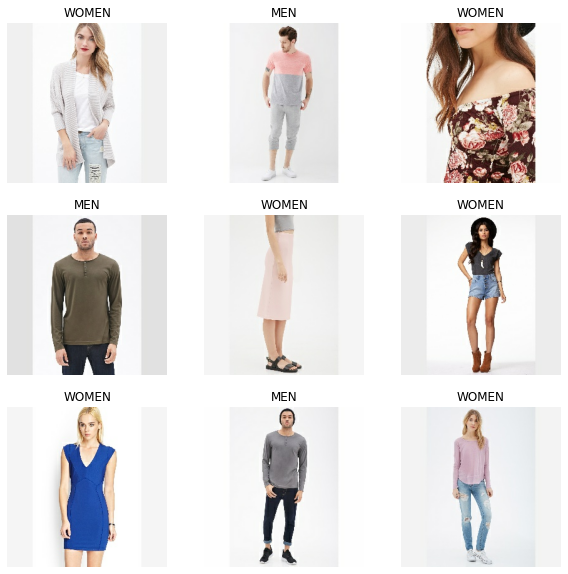

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images,labels in fdata.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
  
plt.show()

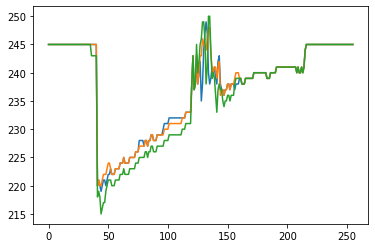

(256, 3)


In [ ]:
plt.plot(images[0][0])
plt.show()

print(images[0][0].shape)

# ResNET Architecture



*   Read about **ResNET** architecture and advantage of residual blocks
*   Build a simple 6-layer ConvNET and train it on **CIFAR-10** dataset
*   Introduce residual blocks in the above model and compare the results 
*   Use the `tensorflow` library to import ResNET model with imgaenet weights
*   Change some parameters and document the results
*   Visualize the output of some layers and add/delete layers to see the effect of individual layers on the model accuracy



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing CIFAR-10 dataset
cifar10=keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

##Using a ConvNET model and training on CIFAR-10 dataset

###Building Simple 6-layer ConvNET

In [ ]:
from tensorflow.keras import layers

convnet_model = keras.Sequential([
                                  layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                                  input_shape=(32, 32, 3)),
                                  layers.MaxPool2D(pool_size = (2,2)),
                                  layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
                                  layers.MaxPool2D(pool_size = (2,2)),
                                  layers.Flatten(),
                                  # layers.Dense(512, activation='relu'),
                                  # layers.BatchNormalization(),
                                  layers.Dense(10, activation='sigmoid'),
])

In [ ]:
convnet_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    # min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = convnet_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=50,
)

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 2.2451 - accuracy: 0.3651 - val_loss: 1.5178 - val_accuracy: 0.4594
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3930 - accuracy: 0.5083 - val_loss: 1.4267 - val_accuracy: 0.5230
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2597 - accuracy: 0.5608 - val_loss: 1.2973 - val_accuracy: 0.5509
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1904 - accuracy: 0.5887 - val_loss: 1.2403 - val_accuracy: 0.5764
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1194 - accuracy: 0.6153 - val_loss: 1.1965 - val_accuracy: 0.5973
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0830 - accuracy: 0.6258 - val_loss: 1.2375 - val_accuracy: 0.5876
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0484 - accuracy: 0.6375 - val_loss: 1.2011 - val_accuracy:

In [ ]:
convnet_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                40970     
Total params: 60,362
Trainable params: 60,362
Non-trainable params: 0
_________________________________________________

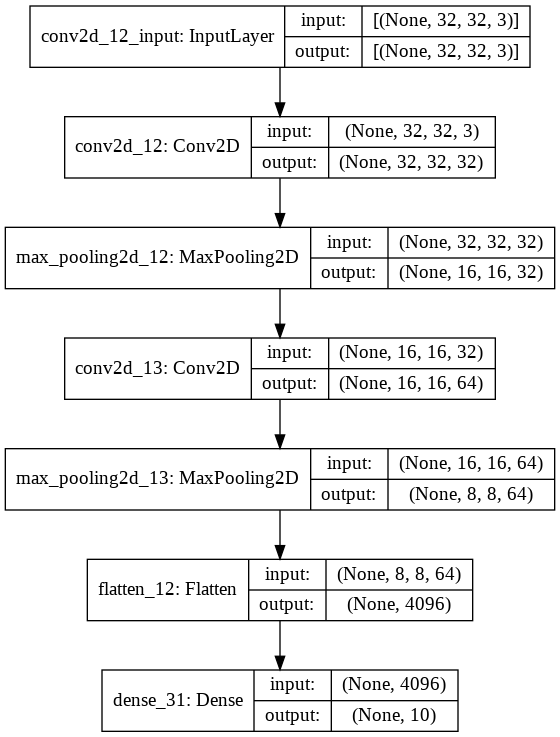

In [ ]:
keras.utils.plot_model(convnet_model, "convet.png", show_shapes=True)

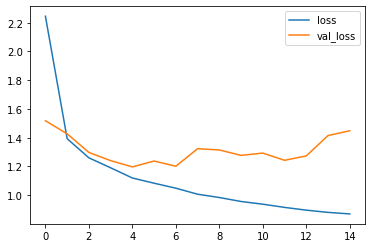

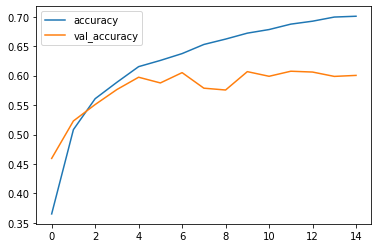

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 31s 98ms/step - loss: 1.5749 - accuracy: 0.4958
Test accuracy: 0.4957999885082245
Test loss: 1.5749396085739136


###Adding Residual Blocks

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, ReLU, BatchNormalization,Add, AveragePooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

def residual_block(x: Tensor, downsample: bool, filters: int=32, kernel_size: int = 3) -> Tensor:
    y = Conv2D(kernel_size=kernel_size,
               strides= (1 if not downsample else 2),
               filters=filters,
               padding="same")(x)
    y = relu_bn(y)
    y = Conv2D(kernel_size=kernel_size,
               strides=1,
               filters=filters,
               padding="same")(y)

    if downsample:
        x = Conv2D(kernel_size=1,
                   strides=2,
                   filters=filters,
                   padding="same")(x)
    out = Add()([x, y])
    out = relu_bn(out)
    return out

Using Single Residual Block

In [ ]:
def create_res_net1():
    #Input Layer
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    #Convolutional Layer 1
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(inputs)
    t = ReLU()(t)
    t = layers.MaxPooling2D(2)(t)

    #Convolutional Layer 2
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    #Residual Block
    t = residual_block(t, downsample=0, filters=num_filters)
    
    t = layers.MaxPooling2D(4)(t)

    #Flatten Layer
    t = Flatten()(t)

    #Output Layer
    outputs = Dense(10, activation='sigmoid')(t)
    
    model = Model(inputs, outputs)

    #Comile the Model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

conv_model = create_res_net1()

In [ ]:
conv_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_60 (Conv2D)              (None, 32, 32, 64)   1792        input_19[0][0]                   
__________________________________________________________________________________________________
re_lu_44 (ReLU)                 (None, 32, 32, 64)   0           conv2d_60[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_24 (MaxPooling2D) (None, 16, 16, 64)   0           re_lu_44[0][0]                   
___________________________________________________________________________________________

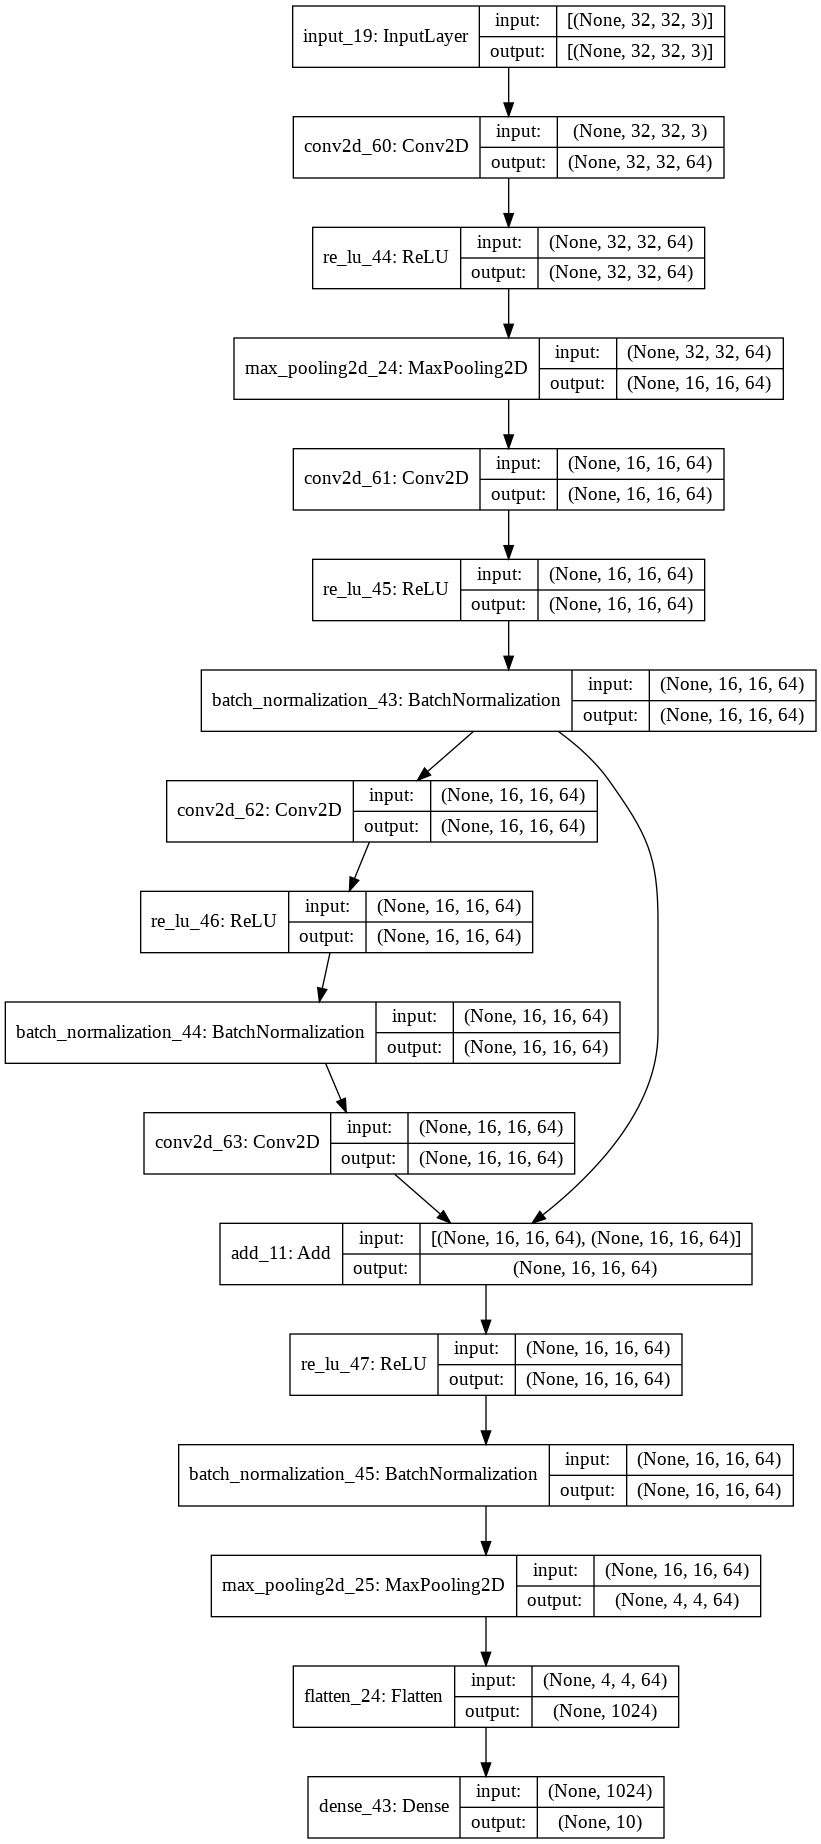

In [ ]:
keras.utils.plot_model(conv_model, "Convnet-with-residual-block.png", show_shapes=True)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    # min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = conv_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=50,
)

Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4229 - accuracy: 0.5103 - val_loss: 1.3637 - val_accuracy: 0.5476
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9993 - accuracy: 0.6519 - val_loss: 0.9672 - val_accuracy: 0.6674
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8473 - accuracy: 0.7063 - val_loss: 0.9036 - val_accuracy: 0.6893
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7480 - accuracy: 0.7411 - val_loss: 1.0435 - val_accuracy: 0.6437
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6784 - accuracy: 0.7650 - val_loss: 1.1473 - val_accuracy: 0.6300
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6187 - accuracy: 0.7840 - val_loss: 0.8584 - val_accuracy: 0.7196
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5680 - accuracy: 0.8027 - val_loss: 0.9281 - val_accuracy:

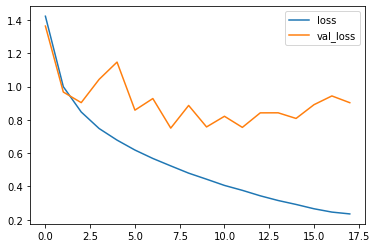

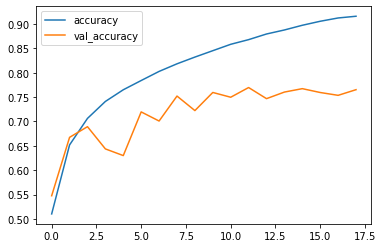

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_loss, test_acc = conv_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.7504 - accuracy: 0.7521
Test accuracy: 0.7520999908447266
Test loss: 0.7504462599754333


Using Multiple Residual Blocks

In [ ]:
def create_res_net2():
    #Input Layer
    inputs = Input(shape=(32, 32, 3))
    num_filters = 64
    
    #Convolutional Layer 1
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(inputs)
    t = ReLU()(t)

    t = layers.MaxPooling2D(4)(t)

    #Convolutional Layer 2
    t = Conv2D(kernel_size=3,
               strides=1,
               filters=num_filters,
               padding="same")(t)
    t = relu_bn(t)

    #Residual Blocks
    num_blocks_list = [2, 5, 5, 2]
    for i in range(len(num_blocks_list)):
        num_blocks = num_blocks_list[i]
        for j in range(num_blocks):
            t = residual_block(t, downsample=(j==0 and i!=0), filters=num_filters)
        num_filters *= 2
    
    t = AveragePooling2D(4)(t)

    #Flatten Layer
    t = Flatten()(t)

    #Output Layer
    outputs = Dense(10, activation='sigmoid')(t)
    
    model = Model(inputs, outputs)

    #Comile the Model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

conv_model2 = create_res_net2()

In [ ]:
conv_model2.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 32, 32, 64)   1792        input_23[0][0]                   
__________________________________________________________________________________________________
re_lu_138 (ReLU)                (None, 32, 32, 64)   0           conv2d_163[0][0]                 
__________________________________________________________________________________________________
conv2d_164 (Conv2D)             (None, 32, 32, 64)   36928       re_lu_138[0][0]                  
___________________________________________________________________________________________

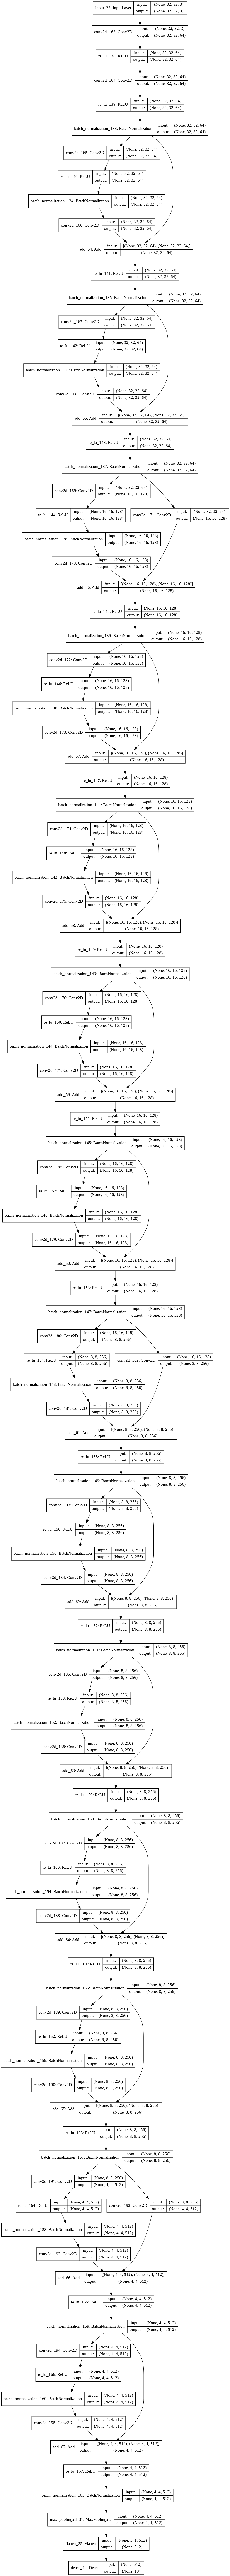

In [ ]:
keras.utils.plot_model(conv_model2, "Convnet-with-residual-blocks.png", show_shapes=True)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = conv_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=50,
)

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4864 - accuracy: 0.8309 - val_loss: 0.8386 - val_accuracy: 0.7374
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4430 - accuracy: 0.8452 - val_loss: 0.8262 - val_accuracy: 0.7473
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4089 - accuracy: 0.8577 - val_loss: 0.8074 - val_accuracy: 0.7528
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3712 - accuracy: 0.8699 - val_loss: 0.9437 - val_accuracy: 0.7232
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3435 - accuracy: 0.8807 - val_loss: 0.8667 - val_accuracy: 0.7419
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3203 - accuracy: 0.8852 - val_loss: 0.8793 - val_accuracy: 0.7602
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.2907 - accuracy: 0.8968 - val_loss: 0.8767 - val_accuracy:

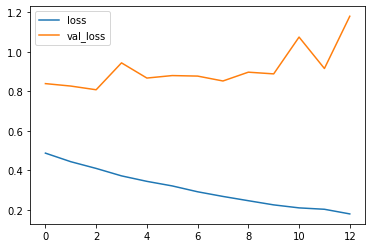

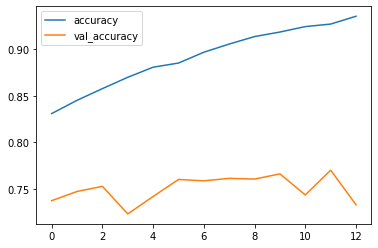

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
test_loss, test_acc = conv_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.8074 - accuracy: 0.7528
Test accuracy: 0.7527999877929688
Test loss: 0.807443380355835


##Using a Pretrained ResNET model and training on CIFAR-10 dataset

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import layers,callbacks

In [ ]:
resnet_base = ResNet50(
  include_top=True,
  weights='imagenet',
  classifier_activation='softmax',
)

resnet_base.trainable = False

resnet_model = keras.Sequential([
    layers.UpSampling2D(size=(7, 7), input_shape=(32,32,3)),
    resnet_base,
    
    layers.Dense(10, activation='sigmoid'),
])

In [ ]:
resnet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy']
                     )

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = resnet_model.fit(
    x=train_images,
    y=train_labels,
    validation_data=(test_images, test_labels),
    batch_size = 32,
    callbacks=[early_stopping],
    epochs=5,
)

Epoch 1/5
1563/1563 [==============================] - 180s 114ms/step - loss: 2.1527 - accuracy: 0.4150 - val_loss: 2.0239 - val_accuracy: 0.4586
Epoch 2/5
1563/1563 [==============================] - 188s 120ms/step - loss: 1.9320 - accuracy: 0.4605 - val_loss: 1.8460 - val_accuracy: 0.4704
Epoch 3/5
1563/1563 [==============================] - 176s 113ms/step - loss: 1.7860 - accuracy: 0.4741 - val_loss: 1.7272 - val_accuracy: 0.4764
Epoch 4/5
1563/1563 [==============================] - 176s 112ms/step - loss: 1.6861 - accuracy: 0.4830 - val_loss: 1.6450 - val_accuracy: 0.4861
Epoch 5/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.6152 - accuracy: 0.4905 - val_loss: 1.5860 - val_accuracy: 0.4957


Result using Single Dense Layer

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_4 (UpSampling2 (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10010     
Total params: 25,646,722
Trainable params: 10,010
Non-trainable params: 25,636,712
_________________________________________________________________


In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 31s 98ms/step - loss: 1.5860 - accuracy: 0.4957
Test accuracy: 0.49570000171661377
Test loss: 1.5860276222229004


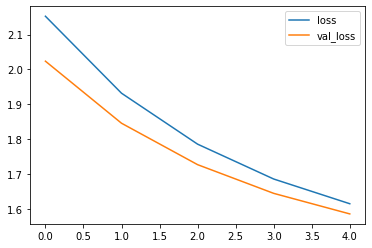

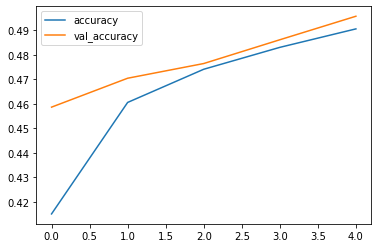

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

Result using 3 dense layers

In [ ]:
test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 40s 127ms/step - loss: 1.0760 - accuracy: 0.6259
Test accuracy: 0.6258999705314636
Test loss: 1.075969934463501


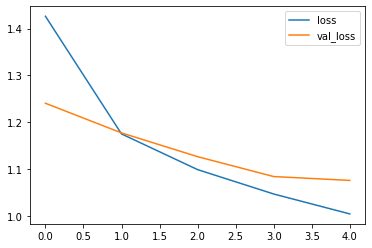

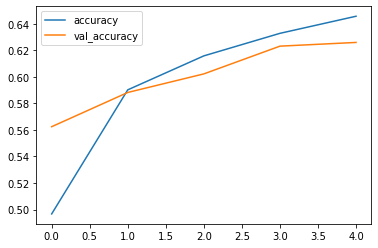

In [ ]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();